<a href="https://colab.research.google.com/github/nishakumari002/House_Price_Prediction/blob/main/House_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('/content/sample_data/train (1).csv')

In [7]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
data.shape

(1460, 81)

In [10]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
data.duplicated().sum()

0

In [12]:
data=data.drop_duplicates()

In [13]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
null_counts=data.isnull().sum()

In [15]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

<Axes: >

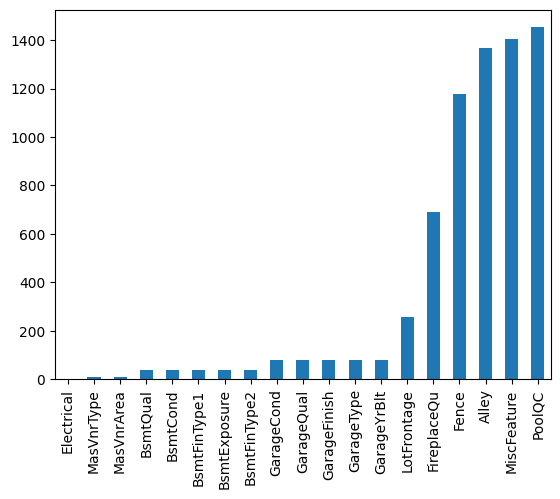

In [16]:
missing=data.isnull().sum()
missing=missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

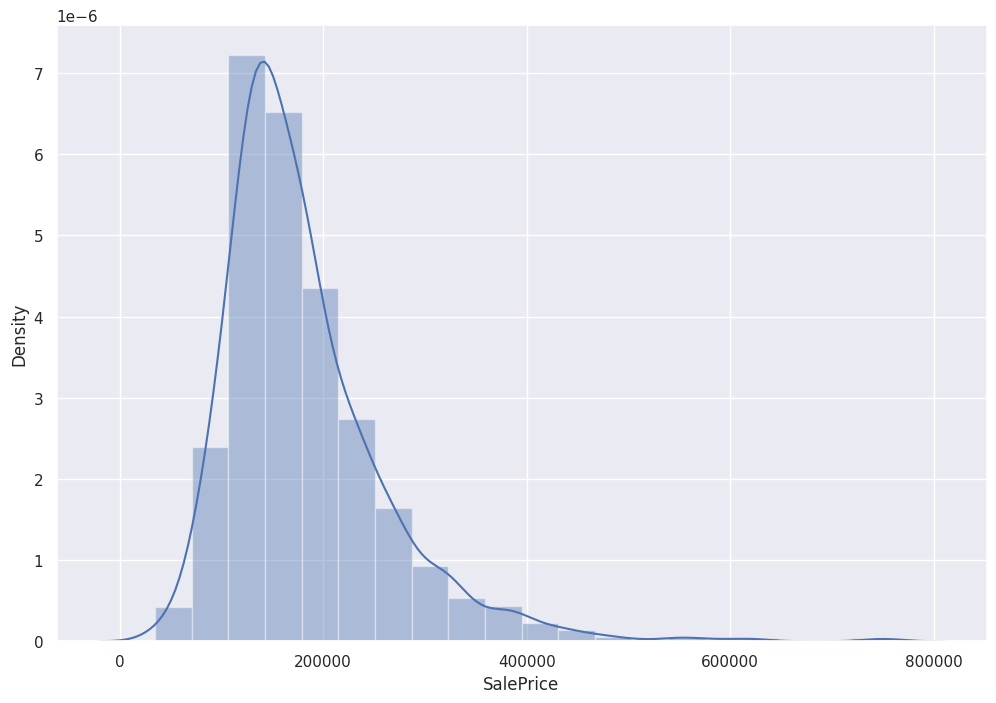

In [17]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(data['SalePrice'], bins=20);

<Axes: xlabel='SalePrice', ylabel='Density'>

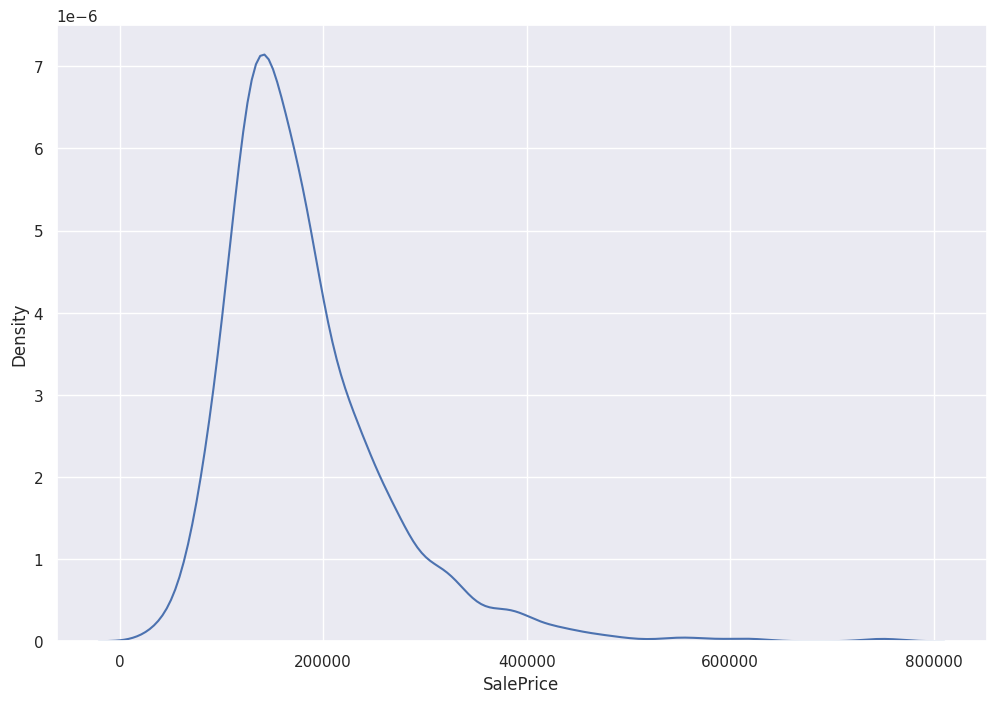

In [18]:
sns.kdeplot(data['SalePrice'])

In [19]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Correlation**

In [20]:
numeric_features=data.select_dtypes(include=[np.number])

numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
categorical_features=data.select_dtypes(include=[np.object])

categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
correlation=numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending=False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: title={'center': 'Correlation of Numeric Features with Sale Price'}>

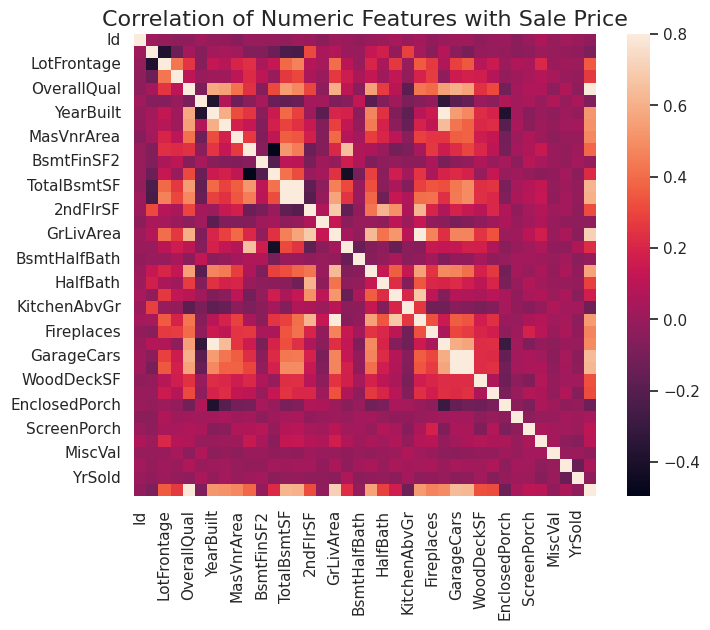

In [23]:
f, ax=plt.subplots(figsize=(8,6))

plt.title('Correlation of Numeric Features with Sale Price', y=1, size=16)

sns.heatmap(correlation, square=True, vmax=0.8)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

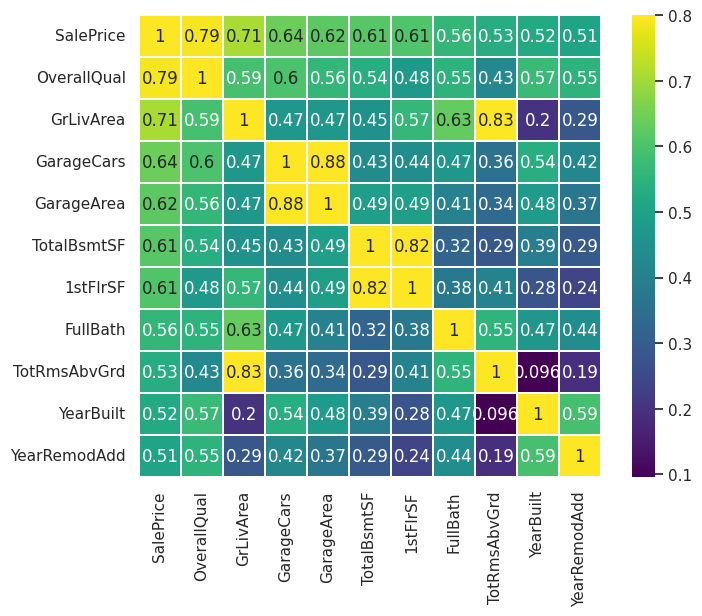

In [24]:
k=11
cols=correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm=np.corrcoef(data[cols].values.T)
f, ax=plt.subplots(figsize=(8,6))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor='white',xticklabels=cols.values ,annot_kws={'size':12},yticklabels=cols.values)

***Scatterplot***

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

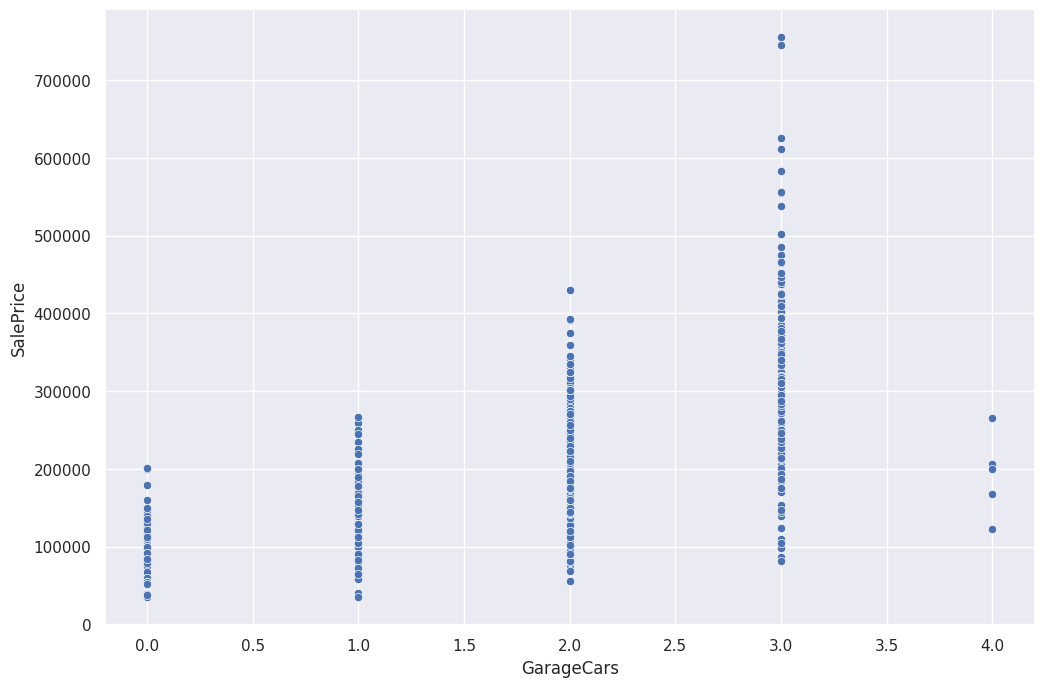

In [25]:
sns.scatterplot(x='GarageCars',y='SalePrice', data=data)

<Axes: xlabel='GarageCars', ylabel='GarageArea'>

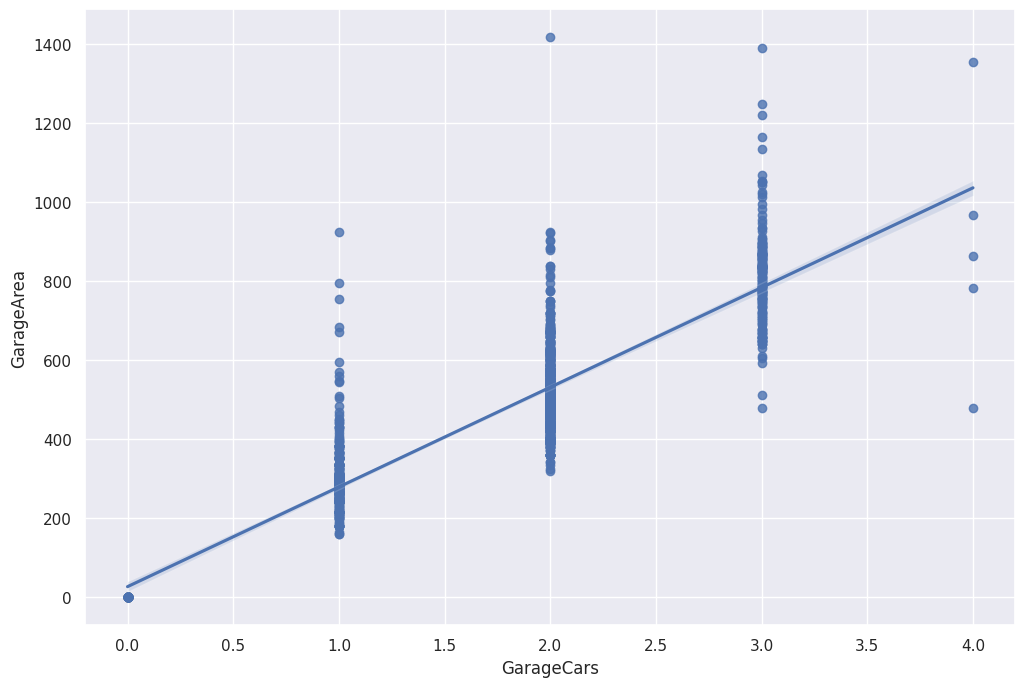

In [26]:

sns.regplot(x='GarageCars', y='GarageArea', data=data, scatter=True, fit_reg=True)

<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

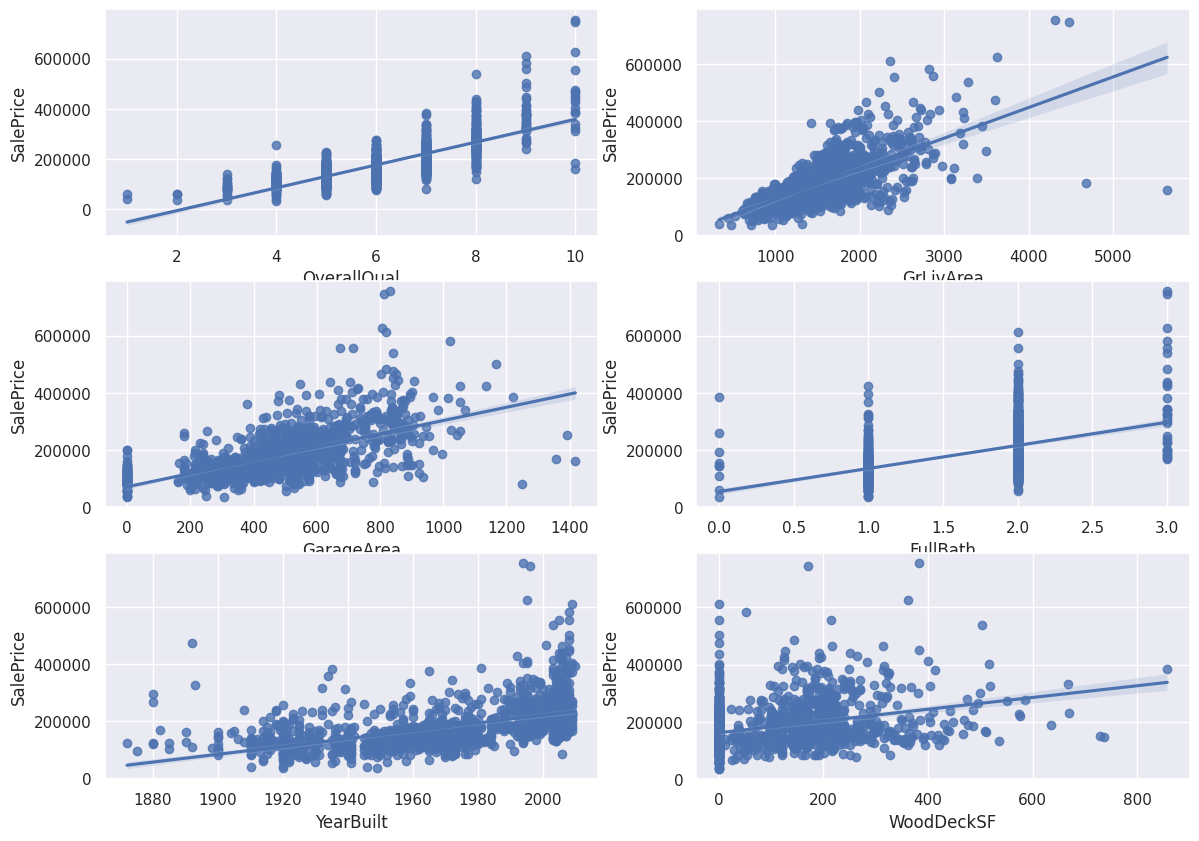

In [27]:
# scatter pots between the most correlated variables
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6))=plt.subplots(nrows=3, ncols=2, figsize=(14,10))

sns.regplot(x='OverallQual',y='SalePrice',data=data,scatter=True, fit_reg=True, ax=ax1)

sns.regplot(x='GrLivArea',y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax2)

sns.regplot(x='GarageArea',y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax3)

sns.regplot(x='FullBath',y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax4)

sns.regplot(x='YearBuilt',y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax5)

sns.regplot(x='WoodDeckSF',y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax6)

***Boxplot***

<Axes: xlabel='SalePrice'>

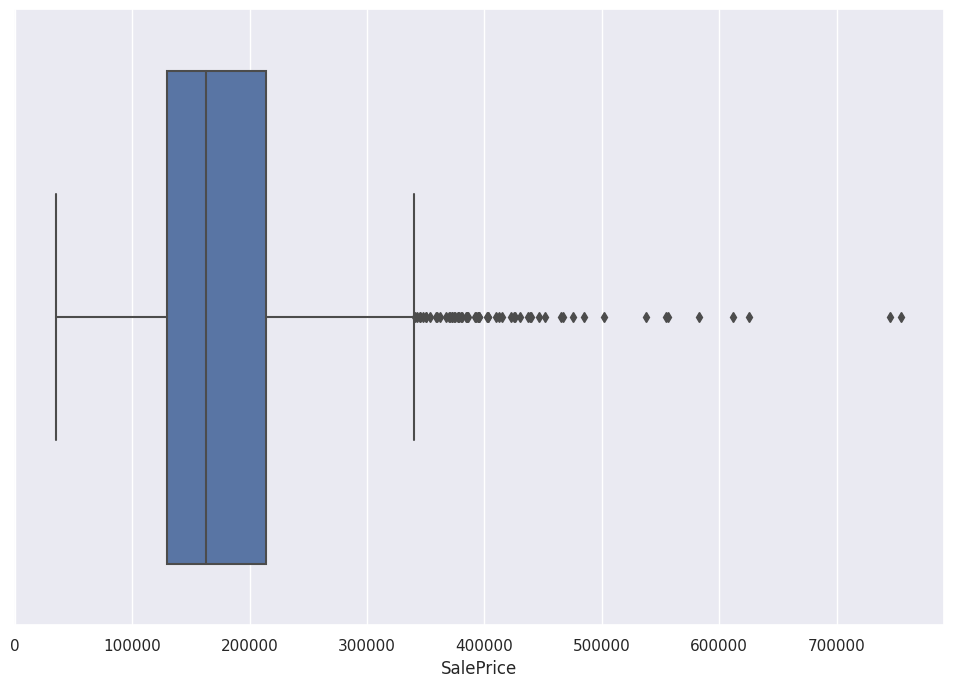

In [28]:
sns.boxplot(x=data['SalePrice'])

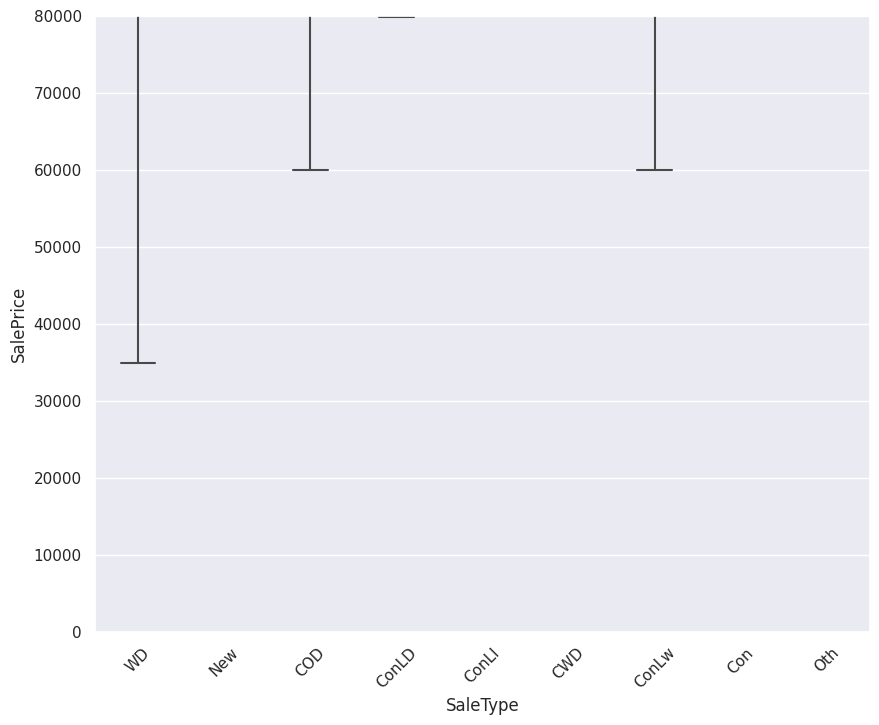

In [29]:
f, ax=plt.subplots(figsize=(10, 8))
fig=sns.boxplot(x='SaleType', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=80000);
xt=plt.xticks(rotation=45)

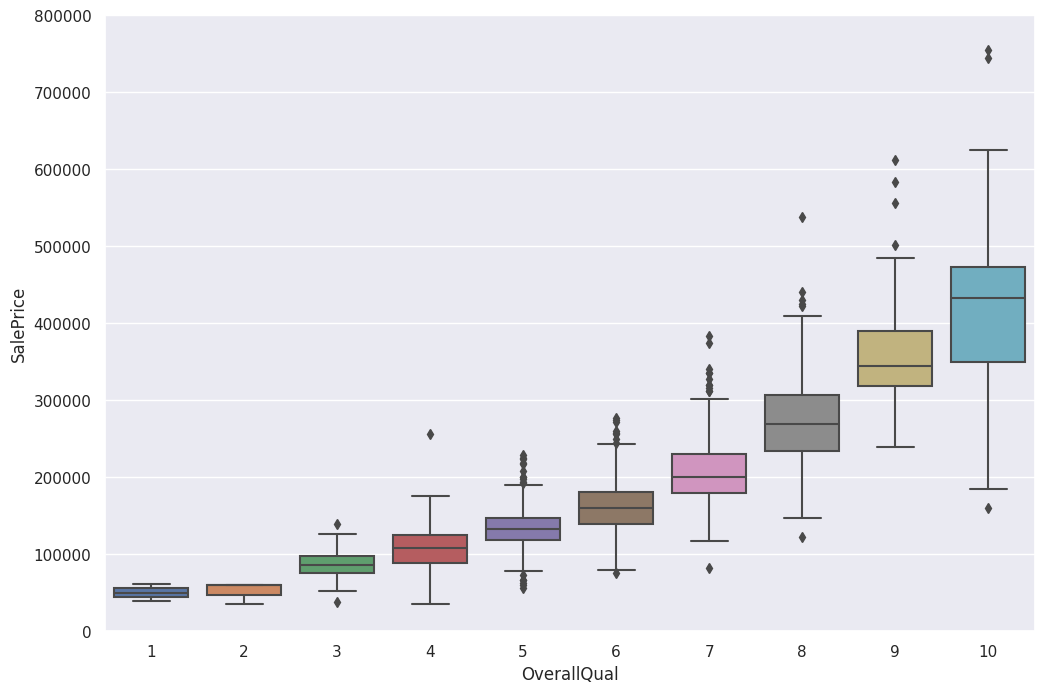

In [30]:
f, ax=plt.subplots(figsize=(12,8))
fig=sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);

***Remove Outliers***

In [31]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice'>

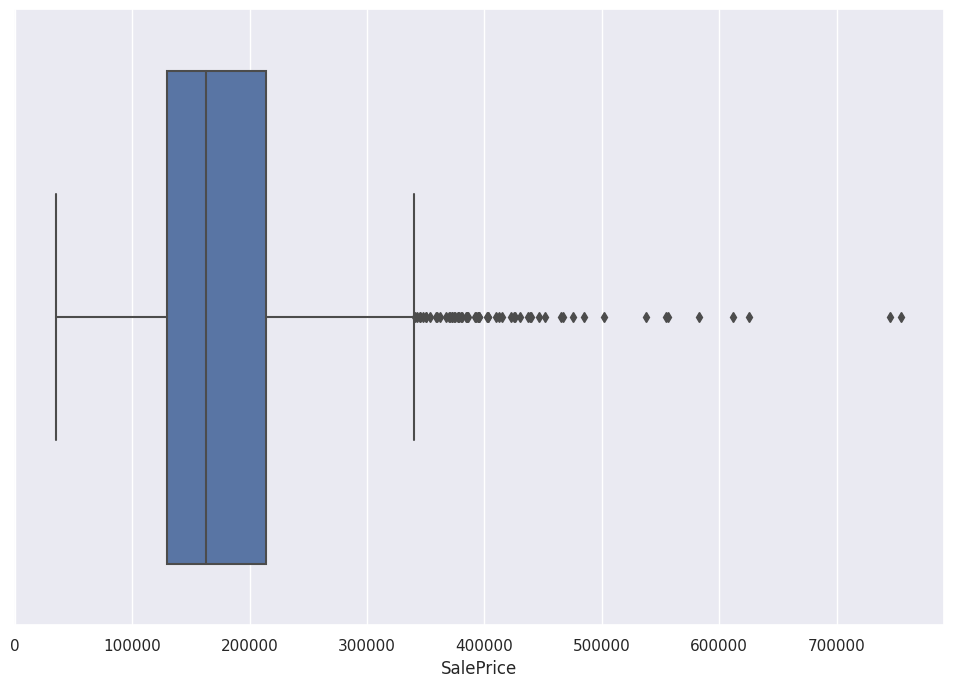

In [32]:
sns.boxplot(x=data['SalePrice'])

In [33]:
data.shape

(1460, 81)

In [34]:
first_quartile=data['SalePrice'].quantile(.25)
third_quartile=data['SalePrice'].quantile(.75)
IQR=third_quartile-first_quartile

In [35]:
new_boundary=third_quartile+3*IQR

In [36]:
data.drop(data[data['SalePrice']>new_boundary].index,axis=0,inplace=True)

In [37]:
data.shape

(1448, 81)

***Outlier values***

***Data Preprocessing (Train test)***

In [38]:
# dropping colmuns where number of null values is greater than 500
null_values = data.loc[:,data.isnull().sum()>500]
data.drop(null_values,axis=1, inplace = True)

In [39]:
# list of less important features
less_important = ['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch',
 '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Condition2', 'BldgType', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtExposure','BsmtFinType1',
 'Heating', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish','SaleType']

# dropping less important columns
data.drop(less_important, axis = 1, inplace = True)

In [40]:
pd.set_option('display.max_rows', None)
pd.DataFrame(data.isna().sum())

,0
LotFrontage,258
LotArea,0
Neighborhood,0
Condition1,0
HouseStyle,0
OverallQual,0
YearBuilt,0
YearRemodAdd,0
RoofStyle,0
RoofMatl,0


In [41]:
# filling null values
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace = True)
data['MasVnrArea'].fillna(0 , inplace = True)
data['BsmtCond'].fillna('NA' , inplace = True)
data['BsmtFinType2'].fillna('NA' , inplace = True)
data['Electrical'].fillna('SBrkr' , inplace = True)
data['GarageYrBlt'].fillna(0 , inplace = True)
data['GarageQual'].fillna('NA' , inplace = True)
data['GarageCond'].fillna('NA' , inplace = True)

***Scatter plot***

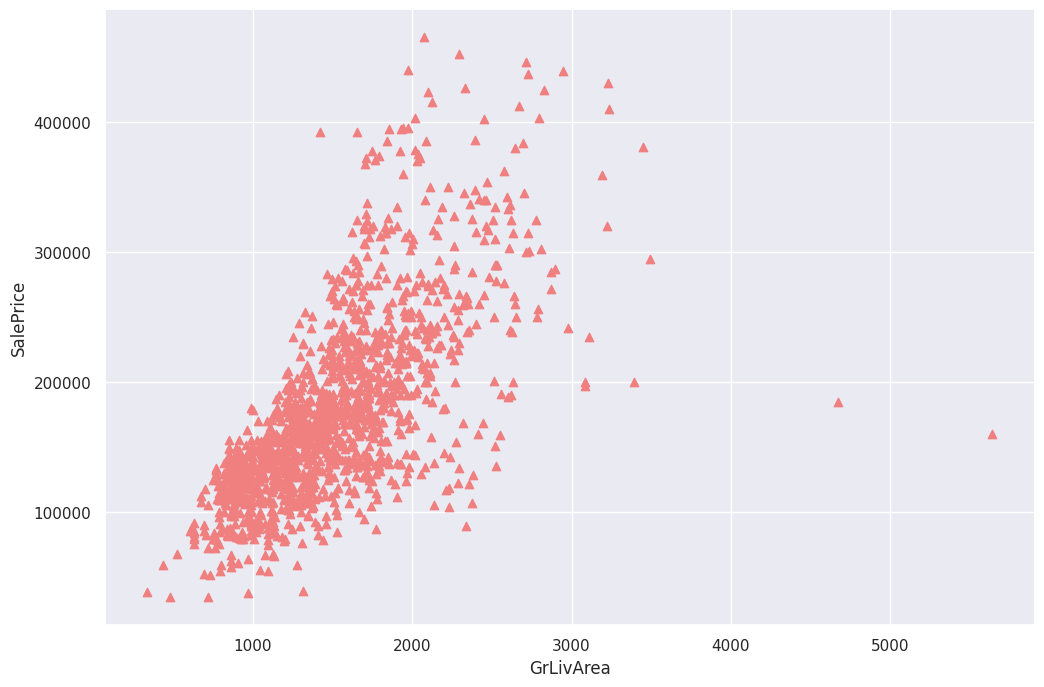

In [42]:
#  plot a scatter plot visualizing GrLivArea and SalePrice

plt.scatter(data.GrLivArea, data.SalePrice, c = "lightcoral", marker ="^")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [43]:
#There are some odd values that saying Ground living area is bigger than 4000. We will treat them as outliers.

#removing outliers
data = data[data.GrLivArea < 4000]

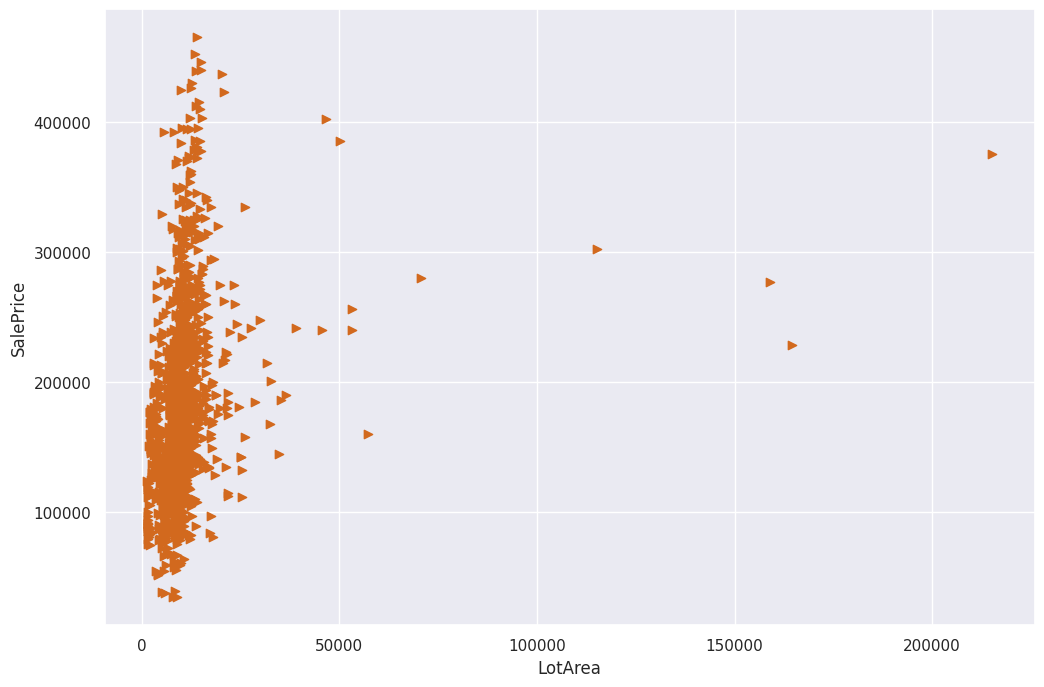

In [44]:
# Let's plot another scatter plot visualizing LotArea and SalePrice

plt.scatter(data.LotArea, data.SalePrice, c = "chocolate", marker =">")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()


In [45]:
# LotArea greater than 150000 as outliers.
#removing outliers
data = data[data.LotArea < 150000]

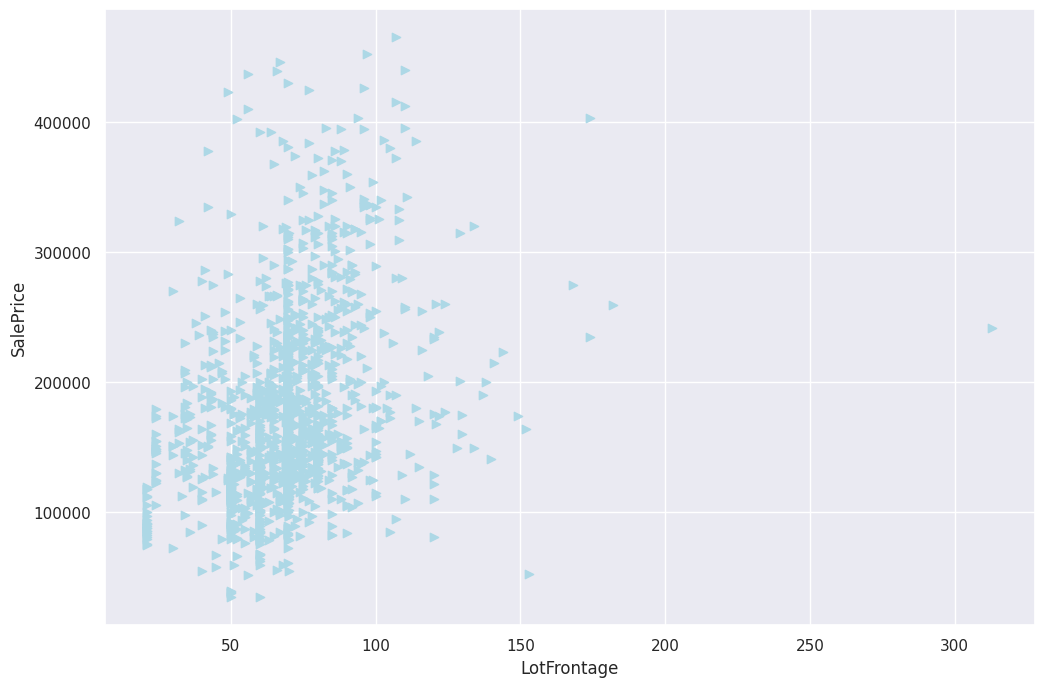

In [46]:
plt.scatter(data.LotFrontage, data.SalePrice, c = "lightblue", marker =">")
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.show()

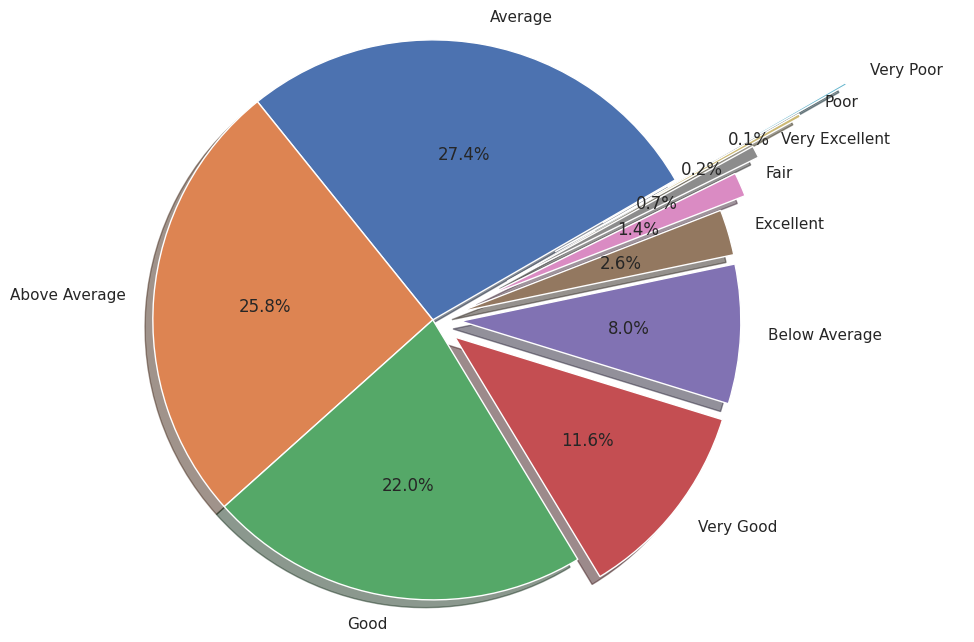

In [47]:
# OverallQual refers overall quality of the house. This is a important feature. SalePrice largly depends on it. Because if the house quality is Very Excellent than it is more likely to be sold with high price. Let's analyse this column.
labels = 'Average', 'Above Average', 'Good', 'Very Good', 'Below Average','Excellent', 'Fair', 'Very Excellent', 'Poor', 'Very Poor'
explode = (0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.2, 0.3, 0.5, 0.7)

fig1, ax1 = plt.subplots()
ax1.pie(data['OverallQual'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')
plt.show()

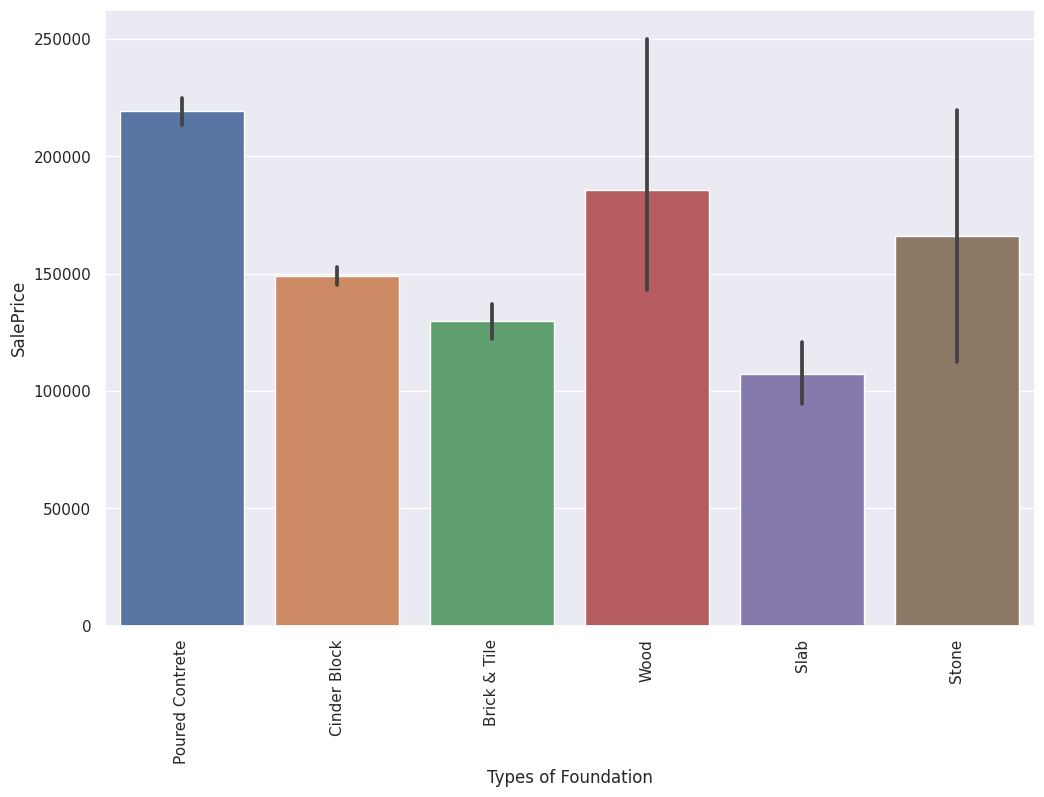

In [48]:
fig = sns.barplot(x = 'Foundation',y = 'SalePrice', data = data)
fig.set_xticklabels(labels=['Poured Contrete', 'Cinder Block', 'Brick & Tile', 'Wood', 'Slab', 'Stone'], rotation=90)
plt.xlabel("Types of Foundation");

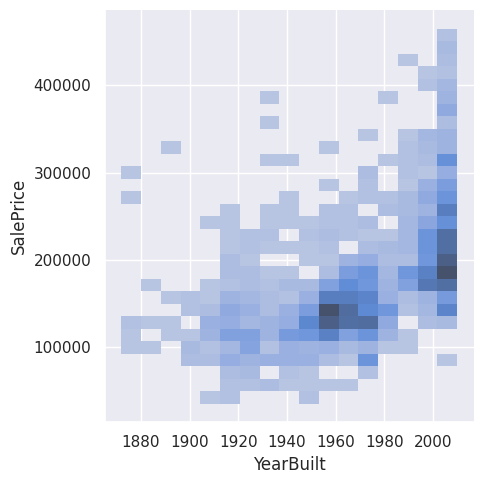

In [49]:
# Let's plot a distribution plot of YearBuilt column representing the year of a house was bult w.r.t saleprice
sns.displot(x = 'YearBuilt', y = 'SalePrice', data = data);


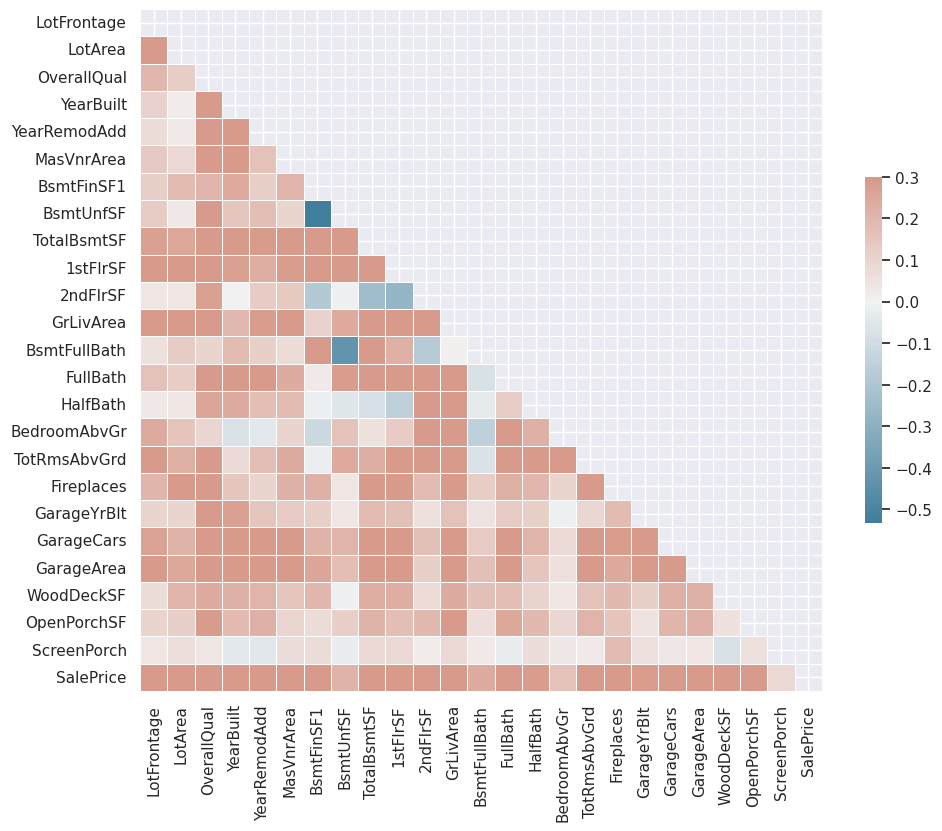

In [50]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

***Modeling***

In [51]:
x = data.drop(['SalePrice'], axis = 1)
y = data['SalePrice']

In [52]:
#labelencoding categorical variables from x
from sklearn.preprocessing import LabelEncoder
x = x.apply(LabelEncoder().fit_transform)

In [53]:
x.head()

,LotFrontage,LotArea,Neighborhood,Condition1,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleCondition
0,36,327,5,2,5,6,104,53,1,0,...,90,2,220,5,5,2,0,49,0,4
1,52,498,24,1,2,5,77,26,1,0,...,63,2,149,5,5,2,185,0,0,4
2,39,702,5,2,5,6,102,52,1,0,...,88,2,260,5,5,2,0,30,0,4
3,31,489,6,2,5,6,19,20,1,0,...,85,3,284,5,5,2,0,24,0,0
4,56,922,15,2,5,7,101,50,1,0,...,87,3,374,5,5,2,117,69,0,4


In [54]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [55]:
x.shape, y.shape

((1443, 42), (1443,))

In [56]:
#splitting the dataset into train and test set.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 31)

In [57]:
len(x_train), len(x_test), len(y_train), len(y_test)


(1082, 361, 1082, 361)

In [58]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

***Linear Regression***

In [59]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [60]:
#Fit the model
model.fit(x_train, y_train)

LinearRegression()

In [61]:
#Prediction
print("Predict value " + str(model.predict([x_test[141]])))
print("Real value " + str(y_test[141]))

Predict value [200000.67536658]
Real value 260000


In [62]:
#Score/Accuracy
print("Accuracy --> ", model.score(x_test, y_test)*100)

Accuracy -->  85.36470916257545


***Random Forest Regression***

In [63]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [64]:
#Fit
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [65]:
#Score/Accuracy
print("Accuracy --> ", model.score(x_test, y_test)*100)

Accuracy -->  89.01641286023279


***Gradient Boosting Regressor***

In [66]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [67]:
#Fit
GBR.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [68]:
print("Accuracy --> ", GBR.score(x_test, y_test)*100)

Accuracy -->  90.7126541452523


***XGBoost Regressor***

In [71]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

In [72]:
# Train the model using the training sets
reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)